## Future permafrost thaw and methane release

In the first notebook, we imported key long term monitoring data from a permafrost thaw gradient from Stordalen Mire, Sweden. 

Here, we wll replicate some of the pan-Arctic permafrost thaw and carbon release simulations run in the McCalley et al. (2014) paper. 

Specifically here we will: - 

1) use literature estimates of permafrost C loss to simulate future thaw emissions\
2) extract estimates of C loss from our simulations\
3) estimate and simulate CH<sub>4</sub> emissions 

Once you have completed the above, you will asked to use this knowledge to **create your own plots of permafrost C & CH<sub>4</sub> fluxes under different warming scenarios and extract simple data** This will enable you to answer the second set of questions in section 2 of the report.


### What are RCPs?

Representative Concentration Pathways (RCPs) were introduced in the Intergovernmental Panel on Climate Change (IPCC Fifth Assessment Report; AR5). There are four pathways: RCP8.5, RCP6.0, RCP4.5 and RCP2.6, each of which represents a set of potential future emission scenarios. "The goal of working with scenarios is not to predict the future but to better understand uncertainties and alternative futures, in order to consider how robust different decisions or options may be under a wide range of possible futures” (IPCC Scenario Process for AR5).

Simply put though, RCP2.6 represents the lowest warming scenario often termed the "best case scenario" and RCP8.5 the scenario often called "business as usual". 

### Why are different RCPs necessary?

“Scenarios of different rates and magnitudes of climate change provide a basis for assessing the risk of crossing identifiable thresholds in both physical change and impacts on biological and human systems” (IPCC Technical Summary, 2007). 

<img src="RCP.png" style ="width:351px;height:270px"/>

Here we will use estimates of permafrost C loss from Schuur et al. (2013) under two representative concentration pathways (RCPs; Table 1) to simulate total-C and CH<sub>4</sub> loss from permafrost up to the year 2300.     


**Table 1. Permafrost Carbon loss (in Petagrams - Pg) assuming CO<sub>2</sub> release by years 2040, 2100 and 2300
as in Schuur et al. 2013.** \
Estimates are presented in a range spanning the 95% confidence intervals.


|                | 2040 (PgC) | 2100 (PgC) | 2300 (PgC) |
|----------------|------------|------------|------------|
| Low (RCP 2.6)  |    5-11    |    40-65   |   92-138   |
| High (RCP 8.5) |    15-33   |   120-195  |   276-414  |\\
|







#### REFERENCES 

IPCC Technical Summary, 2007. “Towards New Scenarios for Analysis of Emissions, Climate Change, Impacts, and Response Strategies" https://www.ipcc.ch/report/ar4/wg1/

Schuur et al. 2013. https://link.springer.com/article/10.1007/s10584-013-0730-7

Tarnocai et al., 2009. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2008GB003327


In [52]:
## A. Scenario for carbon release due to permafrost thaw

start.yr<-1900
end.yr <-2300
T.yr <- seq(start.yr, end.yr)    # year (starting in 1900-equiv)

PC.0 <- 1700  # total Permafrost Carbon stock (Tarnocai et al 2009) 
t.1 <- c(1900, 1935, 1970:2000, 2040, 2100, 2300)   
C.1.lo <- PC.0 - c(0, 0, rep(0,31), 15,120, 276) # PgC estimates assuming RCP2.6 scenario (lower T) 
C.1.hi <- PC.0 - c(0, 0, rep(0,31), 33,195, 414) # PgC estimates assuming RCP2.6 scenario (higher T) 

PC.1.lo <- spline(t.1, C.1.lo, xout=T.yr, method="natural")  # spline interpolation
PC.1.hi <- spline(t.1, C.1.hi, xout=T.yr, method="natural")  # 

Cflux.lo <- - c(0,diff(PC.1.lo$y))  # derivative (i.e. difference) = annual flux of permafrost carbon being lost
Cflux.hi <- - c(0,diff(PC.1.hi$y))  # derivative


Above we created a series of variables in R associated with the upper and lower estimates for the RCP2.6 emissions scenario as in **Table 1** above. 

Where variables:
- *C.1.hi* represent the interpolated upper estimates of the RCP 2.6 emission projections
- *C.1.lo* the lower interpolated estimates of the RCP2.6 projections

*t.1* are the years when estimates of C loss over each climate change scenario are made (spanning 1900 to 2300)  
*PC.0* estimating the Northern hemisphere contains 1700 Pg C in permafrost (Tarnocai et al., 2009)

Run the code below to plot these simulations. 

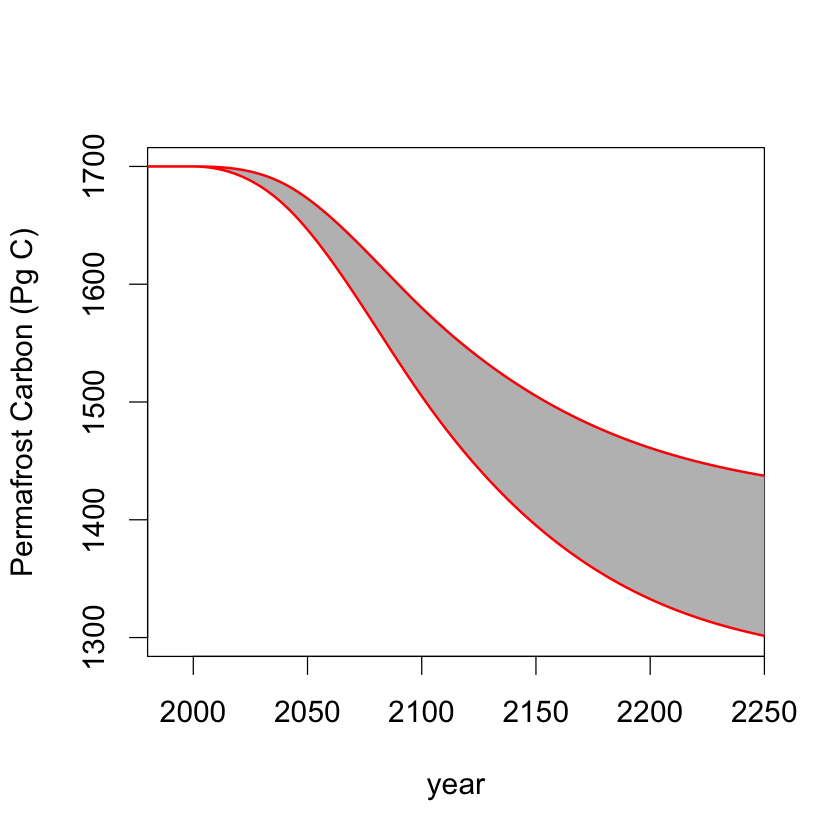

In [58]:
##  Plot permafrost carbon released over time

cx.ax=1 # size of font
par(mfrow=c(1,1), cex=1.5) # position of plot on page

plot(PC.1.hi, type='l', col=2, xlab="year", ylab="Permafrost Carbon (Pg C)", # 'l' line plot. x and y axis labels.
     xlim=c(1990, 2240), ylim=c(1300,1700), cex.axis=cx.ax) # x and y axis range so x from 1990 to 2240 on here (R adds a small additional margin)
        lines(PC.1.lo, type='l', col=3) ### PC 1 low 
            polygon(c(T.yr, rev(T.yr)), c(PC.1.hi$y, rev(PC.1.lo$y)), col="gray", border="red", lwd=2)


Here you should now see the two scenarios for carbon release due to permafrost thaw. The red lines represent the higher temperature range in RCP 2.6 and yellow the lowest. The grey boxes are potential error estimates for each. 

This indicates that, according to this data at least, even under the "best case scenario" we expect a moderate loss of permafrost carbon across the Northern hemisphere, with around a 100 Pg lost (or 6%) by 2200. 

Lets explore this is a little more detail below. 

In [54]:
xhi = PC.1.hi$x 
yhi = PC.1.hi$y

#xhi
#yhi

Run the script above. We have made two new variables from *PC.1.hi*.\
Variable x now contains the first column of PC.1.hi and y the second column.\
Uncheck *xhi* and *yhi* above seperately and rerun the script to see what they contain.  

Hopefully you can tell that:

- *xhi* contains a list of years from 1900 to 2300
- *xlo* contains Permafrost C stocks corresponding to *xhi* (i.e. Permafrost C in PgC estimated to be present in that year)

This is useful as we can now ask R to print out what we think the permafrost C stocks with be in a future year under RPC 2.6 upper T estimate. Running the code below will create and print the y.

Here you can now see the amount of permafrost C (in PgC) that our simulation suggests will be present under these conditions in 2200 and 2300.

In [55]:
Year2200 <- yhi[which(xhi == 2200)] # create a variable "Year 2200" from the value of y (C) when x (years) equals 2200
Year2300 <- yhi[which(xhi == 2300)] # as above for year 2300

Year2200 # prints out variable to screen
Year2300 # prints out variable to screen


[1] 1332.678

[1] 1286

### Permafrost C loss under RCP 8.5 scenarios

Now over to you.\
Copy and adapt the above code to plot permafrost C loss over 1990 to 2240 under the RCP 8.5 scenarios.\
All of the values needed are provided in Table 1 at the top of this notebook. 

Once you have a this plot, copy it in into your report. You will also need to adapt the code above to partly answer part 2 of the report. 

Once you are complete - move on to the next and final section of the notebook.

In [56]:
## copy, paste and edit your code here to answer the questions

## Impact of permafrost thaw on methane (CH<sub>4</sub> ) emissions

Next we examine how fluxes of methane may be affected by permafrost thaw. 

The fraction of CH<sub>4</sub> that will be release from permafrost carbon was determined using lab experiments as 2.3% (Schädel et al. 2016).

We use this in the code below to calculate CH<sub>4</sub> emissions to the atmopshere in Terragrams (Tg CH<sub>4</sub>/y) 

**NOTE** the code below calculates the flux of CH<sub>4</sub> as <u>a fraction of the total C release</u>.\
This is calculated above as the parameters *Cflux.lo* & *Cflux.hi*.\
The code below will therefore run the RCP scenario used above when run (e.g. if you have just run RCP 2.6. scenario for permafrost C loss, this code will calculate CH<sub>4</sub> flux from that). 

Run the code now. 


#### REFERENCES

Schädel et al. 2016. 


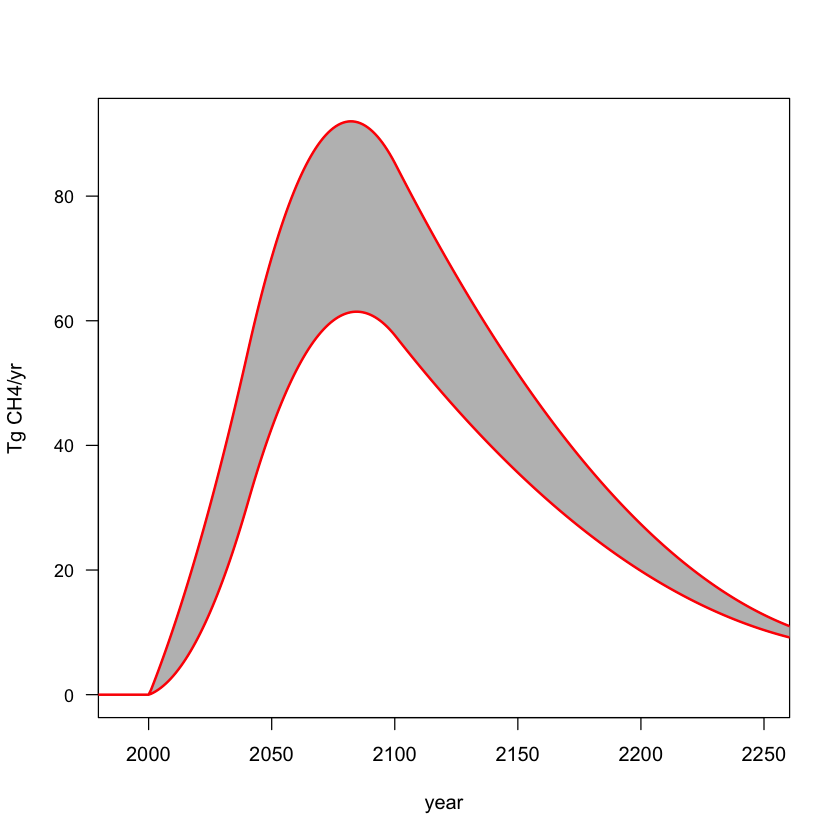

In [57]:
## B Methane fluxes associated with carbon release

frac.ch4 <- 0.023  # Schädel et al. 2016 fraction of CH4 as C released

Fch4.lo <- Cflux.lo * frac.ch4 * 16/12 * 1e3  # flux of carbon from permafrost thaw, fraction releases as CH4 
Fch4.hi <- Cflux.hi * frac.ch4 * 16/12 * 1e3 # 

## methane fluxes
plot(T.yr, Fch4.hi, type='l', xaxt='n', yaxt='n', ylab="Tg CH4/yr", xlab="year", xlim=c(1990,2250))
axis(1, cex.axis=cx.ax)
axis(2, las=1, cex.axis=0.9)
lines(T.yr, Fch4.lo, type='l')
polygon(c(T.yr, rev(T.yr)), c(Fch4.hi, rev(Fch4.lo)), col="gray", border="red", lwd=2)


### Permafrost CH<sub>4</sub> loss under RCP 8.5 scenarios

Now over to you for the final task.\
Run the above code to plot CH<sub>4</sub> loss over 1990 to 2240 under **both** the RCP2.6 & RCP 8.5 scenarios.

Once you have these plots, copy both into your report. You will also need to adapt the code above to partly answer part 2 of the report. 

Once you are complete - you should now have all of the plots needed to complete section 2 of the report.

Well done!

In [51]:
## hint:: to extract methane flux values from your scenarios take a look at the Fch4.lo and Fch4.hi 

